# Classification of Images with Keras

This notebook is covering a classification problem using Neural networks techniques. We have images from different types of nature ( glacier, sea, forest, street, mountain and buildings). We will use keras to help us classify the images to their correspondent category. 

In [2]:
# import the needed packages
import sys
import os
from PIL import Image
import matplotlib.pyplot as plot
import tensorflow as tf
import cv2
import numpy as np
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
import matplotlib.gridspec as gridspec
from keras.utils.vis_utils import model_to_dot
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


As it was my first time using tensorflow, I needed to install the package. 

In [50]:
print(sys.version)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


In [44]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow --user

  Stored in directory: C:\Users\danie\AppData\Local\pip\Cache\wheels\a7\15\a0\0a0561549ad11cdc1bc8fa1191a353efd30facf6bfb507aefc
  Stored in directory: C:\Users\danie\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\danie\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\danie\AppData\Local\pip\Cache\wheels\2c\b1\94\43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
Successfully built absl-py termcolor gast opt-einsum
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Here I am bringing some of the pictures that we need to classify so we can have an idea how they look like. We have a total of 14034 pictures.

In [32]:
# let's look at some pictures we have in the library
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [55]:
Images, Labels = get_images('old_project/seg_train/seg_train/')

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [56]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


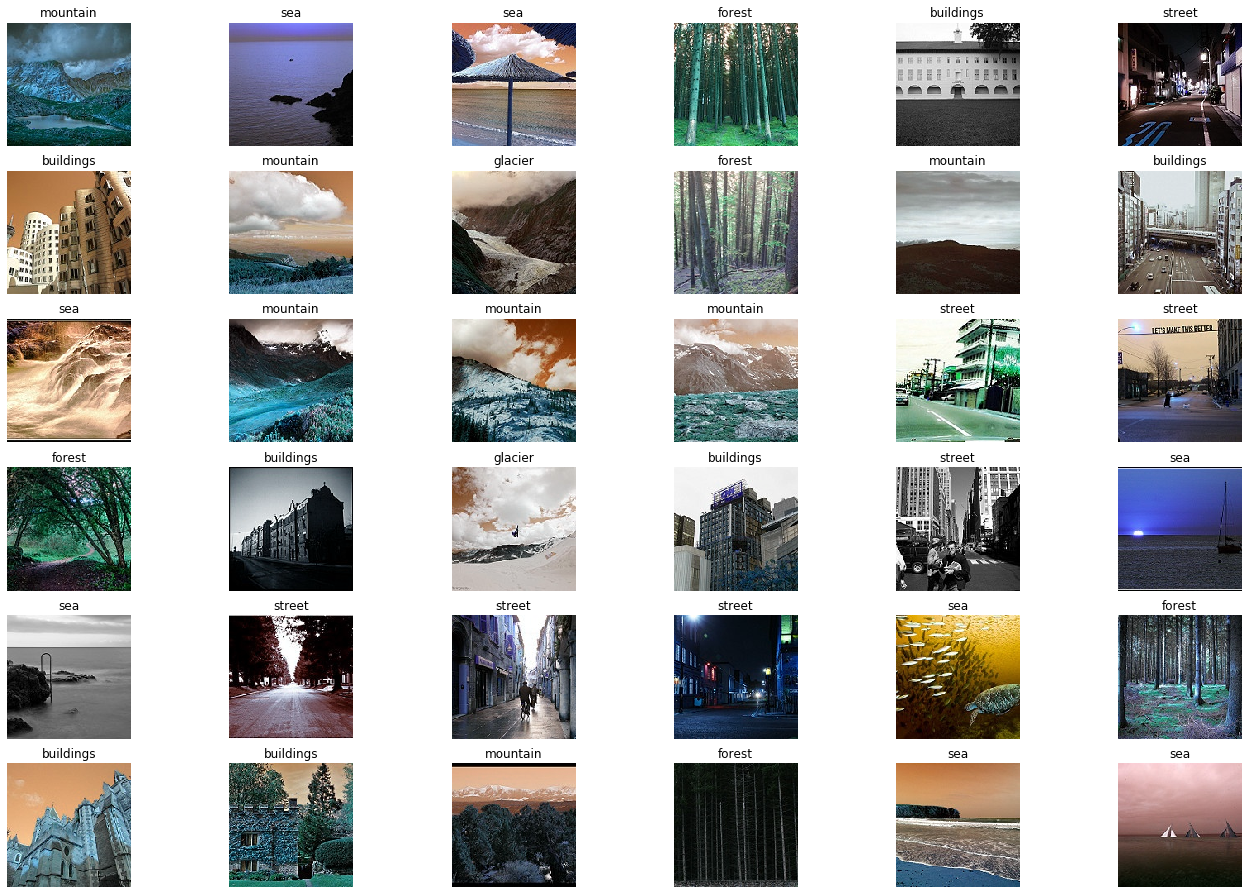

In [36]:
f,ax = plot.subplots(6,6) 
f.subplots_adjust(0,0,3,3)
for i in range(0,6,1):
    for j in range(0,6,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

### Model CNN

This model uses perceptrons, a machine learning unit algorithm, for supervised learning, to analyze data (regularized version of multilayer perceptrons). CNNs apply to image processing, natural language processing and other kinds of cognitive tasks. CNN has an input and output layer as well as a multiple hidden layers (a series of convolutional layers taht convolve with a multiplication or dot product). Activation function = RELU layer followed by additional convolutions. The final convolution involves backpropagation to more accurately weight the end product.

In [14]:
# we fit the model to predict the class labels
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 21, 21, 50)       

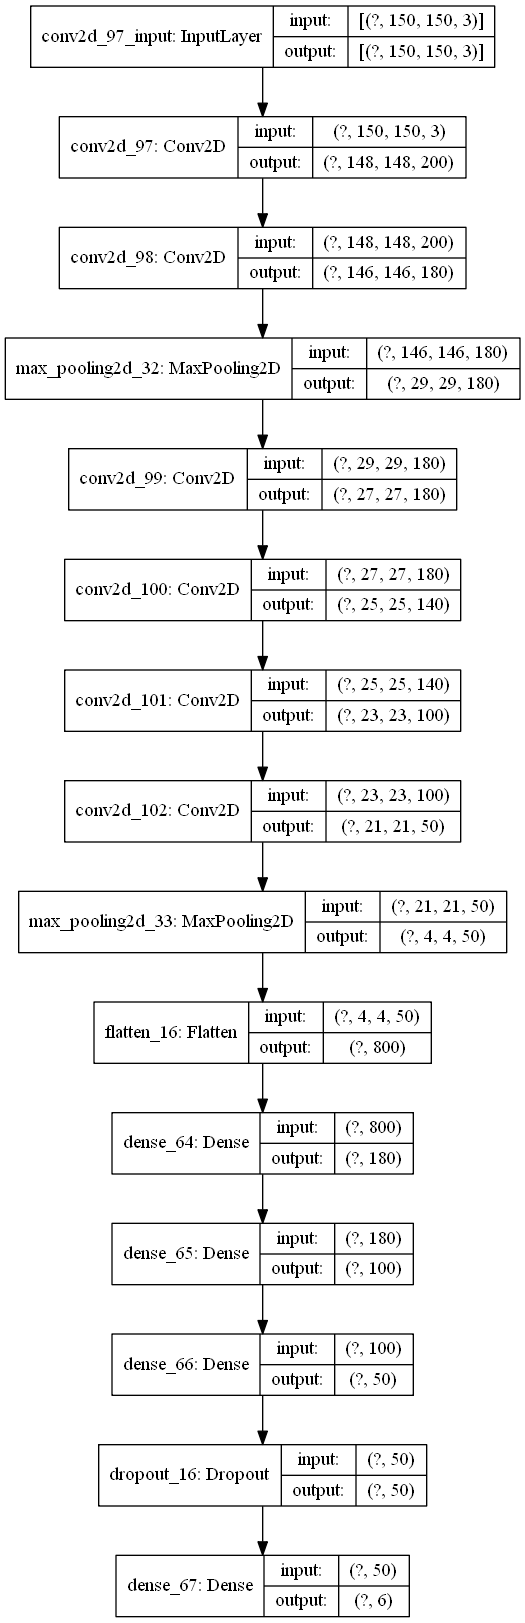

In [3]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)
myImage = Image.open("model.png")
myImage

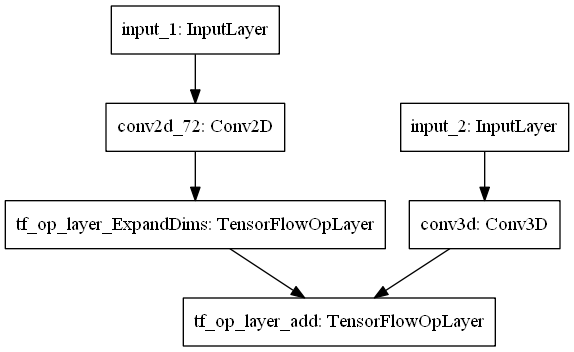

In [4]:
myImage = Image.open("model_combined.png")
myImage

In [19]:
# we train the model with a split of 80 to 20
trained = model.fit(Images,Labels,epochs=3,validation_split=0.20)

Train on 11227 samples, validate on 2807 samples
Epoch 1/3
11227/11227 [==============================] - 2657s 237ms/sample - loss: 1.0059 - accuracy: 0.6151 - val_loss: 0.8842 - val_accuracy: 0.6751
Epoch 2/3
11227/11227 [==============================] - 3578s 319ms/sample - loss: 0.9041 - accuracy: 0.6618 - val_loss: 0.7466 - val_accuracy: 0.7228
Epoch 3/3
11227/11227 [==============================] - 4745s 423ms/sample - loss: 0.7989 - accuracy: 0.7202 - val_loss: 0.6671 - val_accuracy: 0.7556


Although we only used few epochs (3 in this case). The accuracy for the last attempt is actually not too bad.

In future work I will be using more epochs to improve accuracy, try other models as well as using different datasets to become more familiar with Neral Networks.

End